### Example L
Herein, we demonstrate the usage of DiffusionConvection subsurface model to simulate an enhanced geothermal system (EGS).

In [1]:
# Only needed when FGEM is NOT installed by user
import sys
sys.path.insert(1, '../')

from fgem.world import World
from fgem.utils.config import get_config_from_json
from tqdm import tqdm
from fgem.utils.utils import plot_cols
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
def hour_of_year(dt): 
    beginning_of_year = datetime.datetime(dt.year, 1, 1, tzinfo=dt.tzinfo)
    return int((dt - beginning_of_year).total_seconds() // 3600)
    
# data center power demand 
df_dc = pd.read_csv("../examples/data/sample_project/example_data_center_load.csv")
df_dc['Timestamp'] = pd.to_datetime(df_dc.Timestamp)
df_dc['Hour'] = df_dc.Timestamp.dt.day
df_dc['Day'] = df_dc.Timestamp.dt.day
df_dc['Month'] = df_dc.Timestamp.dt.month

# Read configuration file
config = get_config_from_json('configs/exampleL_Scalable_EGS.json')

config["sup3rcc_weather_forecast"] = True
config['resample'] = '1h'
config['powerplant_capacity'] = 110
# config['m_prd_pp_design'] = 150

config['V_res'] = config['lateral_length'] * config['res_thickness'] * 300/1e9 * config['num_prd']
config['phi_res'] = 0.1
config["drilling_cost"] = 1500
config['num_prd'] = 5

config["time_init"] = "2027-01-01"
config['L'] = 10
# config['powerplant_type'] = 'binary_geophires'

project = World(config)
reset_yet = False

# Iterate over project lifetime
for i in tqdm(range(project.max_simulation_steps-1)):
    if i == 0:
        project.step_update_record()
        
    # project.step_update_record()
    timestep = project.timesteps[i]
    
    if project.time_curr.year - project.time_init.year < 1:
        # project.step_update_record(m_prd=40)
        
        load = 22
        m_prd = min(1/(project.power_output_MWh_kg /load)/3600/project.num_prd, 200)
        project.step_update_record(m_prd=m_prd)
        
    else:
        # project.step_update_record(m_prd=150)
        
        hoy = min(hour_of_year(project.time_curr), 8759)
        load = df_dc.loc[hoy, 'Load_MWe']
        m_prd = min(1/(project.power_output_MWh_kg /load)/3600/project.num_prd, 200)
        project.step_update_record(m_prd=m_prd)
    
    # load = 100
    # hoy = min(hour_of_year(project.time_curr), 8759)
    # load = df_dc.loc[hoy, 'Load_MWe']*1.1
    # m_prd = min(1/(project.power_output_MWh_kg /load)/3600/project.num_prd, 200)
    # project.step_update_record(m_prd=m_prd)

    # if i >2*8760:
    #     break
    
# Compute economics and summary results
project.compute_economics()

# import numpy as np
# project.df_records.loc[df_records['Year']<=2027, 'Net Power Output [MWe]'] = np.minimum(project.df_records.loc[df_records['Year']<=2027, 'Net Power Output [MWe]'].values, 20)
project.df_records = project.df_records.bfill()


Query weather forecasts from Sup3rCC ...


https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 87599/87599 [00:39<00:00, 2233.97it/s]
Temperature outside valid area
Region switch v_pt returned unknown value 0 for input p 17.553000 and T 272.950000
Temperature outside valid area
Region switch v_pt returned unknown value 0 for input p 17.553000 and T 272.120000
Temperature outside valid area
Region switch v_pt returned unknown value 0 for input p 17.553000 and T 271.530000
Temperature outside valid area
Region switch v_pt returned unknown value 0 for input p 17.553000 and T 271.260000
Temperature outside valid area
Region switch v_pt returned unknown value 0 for input p 17.553000 and T 270.810000
Temperatu

LCOE: 77 $/MWh
NPV: -87 $MM
PBP: 9 yrs


In [ ]:
# project.Cplant*1e6/(project.powerplant_capacity*1e3)

In [ ]:
# fig = project.reservoir.plot_doublet()

In [3]:
# fig = project.plot_economics()

In [4]:
# project.powerplant

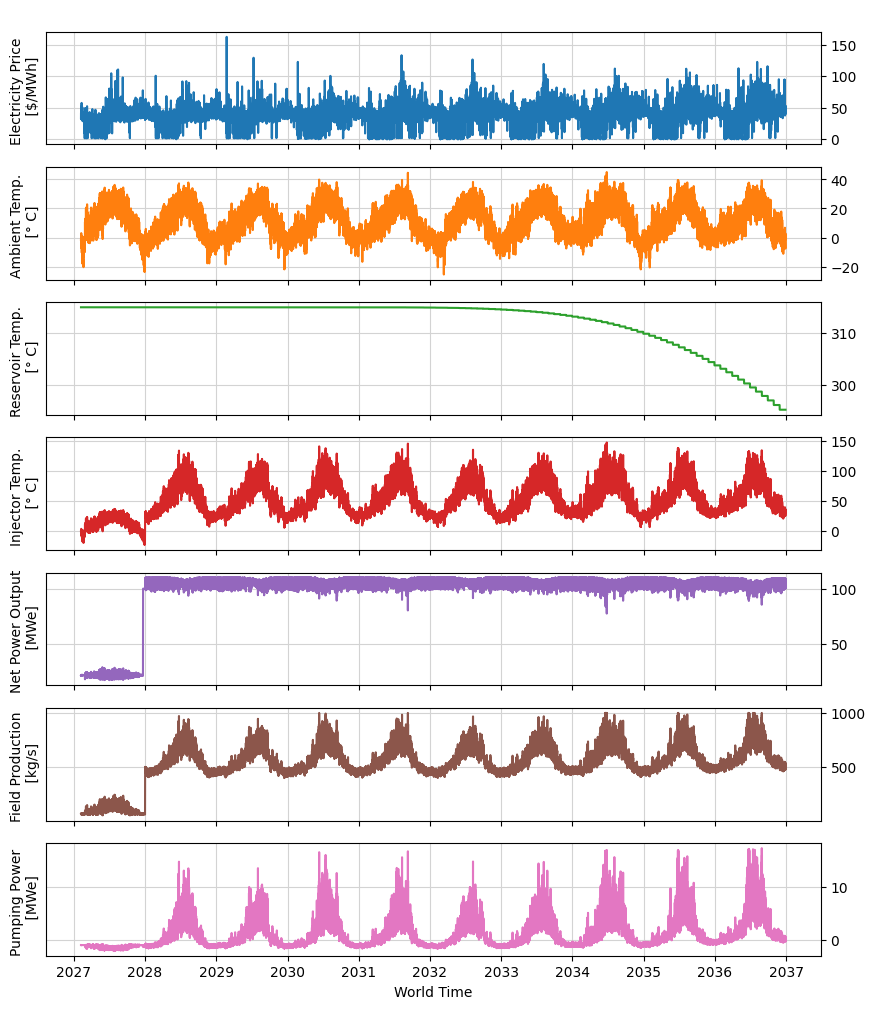

In [5]:
# fig = project.plot_operations(span=range(project.step_idx-8760, project.step_idx))
fig = project.plot_operations()


In [6]:
# plt.plot(df_dc.Timestamp, df_dc.Load_MWe)

In [10]:
df_records = project.df_records

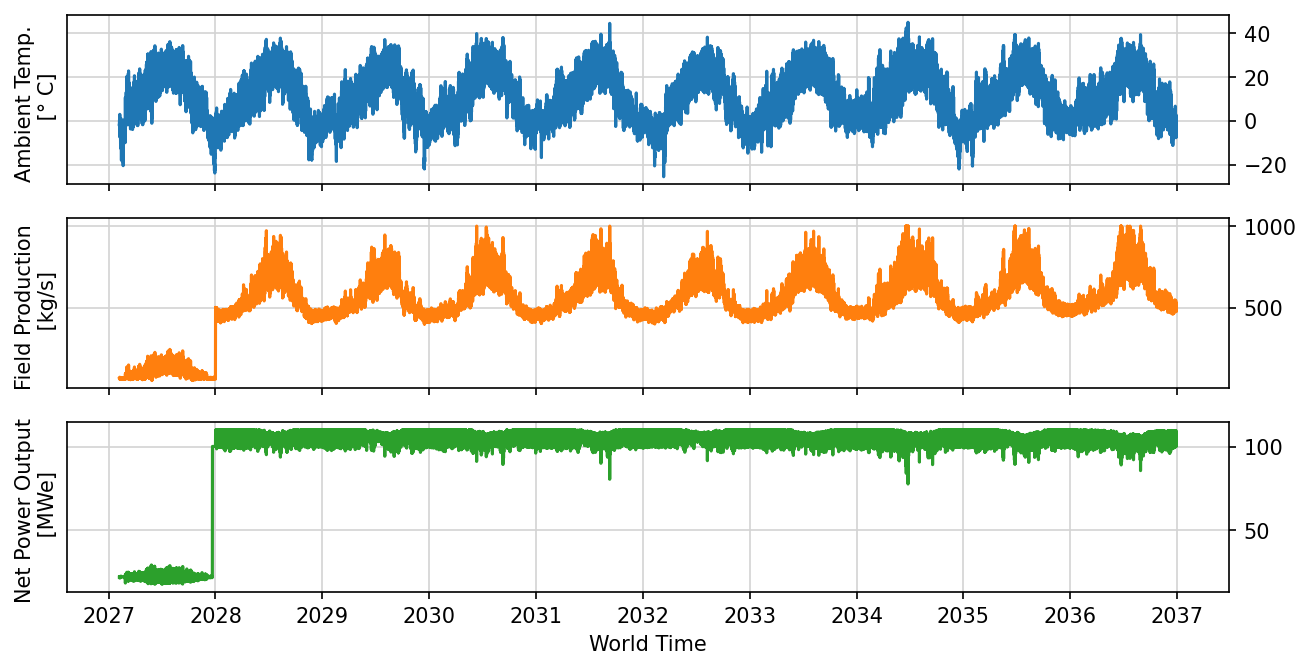

In [12]:
figsize=(10,5)
span = range(int(0.01*project.max_simulation_steps), project.step_idx)
legend_loc=False
dpi=150
formattime=False

qdict = {
# "LMP [$/MWh]": "Electricity Price \n [$/MWh]",
"Atm Temp [deg C]": "Ambient Temp. \n [° C]",
# "Res Temp [deg C]": "Reservoir Temp. \n [° C]",
# 'Inj Temp [deg C]': "Injector Temp. \n [° C]",
'M_Produced [kg/s]': "Field Production \n [kg/s]",
"Net Power Output [MWe]": "Net Power Output \n [MWe]",
# "Pumping Power [MWe]": "Pumping Power \n [MWe]"
}


quantities = list(qdict.keys())
ylabels = list(qdict.values())

span = span if span else range(int(0.01*self.max_simulation_steps), self.step_idx)
fig = plot_cols({"": df_records}, span, quantities, 
                        figsize=figsize, ylabels=ylabels, legend_loc=legend_loc, dpi=dpi, 
                    formattime=formattime)